# Week 10, Clustering

**_Author: Jessica Cervi_**

**Expected time = 2 hours**

## Assignment overview


In Week 10, you leart about cluster analysis. 
Clustering can be defined as 'the process of organising objects into groups whose members are similar in some way'.
Clustering is crucial because it determines the intrinsic grouping within unlabelled data. Clustering algorithms make some assumptions about data points to constitute their similarity. Thus, each hypothesis will construct different but equally valid clusters.

For example, if you built a fruit classifier, it would say 'this is an orange, this is an apple', based on you showing it examples of apples and oranges.
Clustering is the result of unsupervised learning, which means that you’ve seen lots of examples but don’t have labels. In this case, the clustering might return with 'fruits with soft skin and lots of dimples', 'fruits with shiny hard skin'  based merely on showing lots of fruit to the system, but not identifying the names of the different types of fruit. 



This assignment is designed to help you apply the machine learning algorithms you have learnt using packages in Python. Python concepts, instructions and a starter code are embedded within this Jupyter Notebook to guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.


### Learning objectives


- Define the concept of proximity for clustering methods
- Outline the steps involved in hierarchical clustering
- Understand why hierarchical clustering is myopic
- Outline the steps involved in K-means clustering


## Index:

#### Week 10:   Clustering


- [Part 1](#part1)- Importing the data set and exploratory data analysis (EDA)
- [Part 2](#part2)- Data preprocessing
- [Part 3](#part3)- Identify the areas in the city that experience more criminal activity
- [Part 4](#part4)- Clustering without normalisation
- [Part 5](#part5)- Clustering with normalisation
- [Part 6](#part6) - Hierarchical clustering
- [Part 7](#part7) - A simple example of hierarchical clustering




## Clustering


K-means clustering is a type of unsupervised learning, which is used when you have unlabelled data (i.e. data without defined categories or groups). The goal of this algorithm is to find groups in the data with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided. Data points are clustered based on the similarity in features. The results of the K-means clustering algorithm are as follows:

- The centroids of the K clusters, which can be used to label new data

- Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret the kind of group each cluster represents.


### Visualising crimes in Chicago using clustering


In this notebook, we will try and exploit information  regarding crimes in Chicago. We will perform the following steps:


- 1. Read the `Crimes_2001_to_present_sample.csv` file in Python
- 2. Drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Next, convert the column `Date` to datetime format and define two new columns, `date` and `time`.
- 3. Define a dataframe, `sub_df` with the columns `Ward`, `IUCR` and  `District`. Impute all the missing values with the most frequent value in each column. Drop any non-numerical value in the column `IUCR`.
- 4. Perform clustering without normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.
- 5. Perform clustering with normalisation on the new dataframe. Compute the K-means for N=1,2,..,20 and their score to produce an elbow chart to  predict the optimal number of clusters for this problem. Once you have identified this optimal number, recompute the K-mean.



[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 -  Importing the data set and exploratory data analysis (EDA)

The data set contains records from 2001 to present day, but with only 65k-66k records compared to the original dataset, which has around 6.6m records. If anyone is interested in analysing the original data set, it can be found [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

Nonetheless, 65k instances should be enough information to give us some good insights into the crime scene in Chicago. Let's get started by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import pylab as pl

 We will then use `pandas` to import the data set. Complete the code cell below by adding the name of the data set as a `str` to `.read_csv()`. Assign the dataframe to the variable `df`.

In [2]:
df = pd.read_csv('Crimes_2001_to_present_sample.csv')


Before building any machine learning algorithms, we should explore the data.

We begin by visualising the first ten rows of the dataframe `df` using the function `.head()`. By default, `.head()` displays the first five rows of a dataframe.

Complete the code cell below by passing the desired number of rows as an `int` to the function `.head()`.

In [3]:
df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"
5,6162396,2182182,HH429064,06/09/2002 05:00:23 AM,045XX N ASHLAND AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,...,47.0,3.0,18,1164839.0,1930205.0,2002,04/15/2016 08:55:02 AM,41.964093,-87.669321,"(41.964093, -87.669321)"
6,720409,2839797,HJ500224,07/16/2003 05:45:00 PM,016XX N MAPLEWOOD AVE,0620,BURGLARY,UNLAWFUL ENTRY,PARK PROPERTY,False,...,1.0,24.0,05,1159114.0,1910852.0,2003,04/15/2016 08:55:02 AM,41.911107,-87.690903,"(41.911107, -87.690903)"
7,2251410,7313423,HS117845,01/12/2010 10:30:00 PM,015XX S SANGAMON ST,0810,THEFT,OVER $500,STREET,False,...,25.0,28.0,06,1170443.0,1892718.0,2010,02/04/2016 06:33:39 AM,41.861105,-87.649815,"(41.861105, -87.649815)"
8,557591,10374717,HZ110903,12/27/2015 02:13:00 AM,050XX S WASHINGTON PARK CT,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,...,3.0,38.0,26,NaN,NaN,2015,01/15/2016 12:18:25 PM,NaN,NaN,NaN
9,4676604,3339646,HK381485,05/22/2004 07:07:14 PM,001XX N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,42.0,32.0,06,1176352.0,1900927.0,2004,04/15/2016 08:55:02 AM,41.883500,-87.627877,"(41.8835, -87.627877)"


[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Data preprocessing

When building any machine learning algorithm, it is always useful, after analysing your data, to eliminate features that are redundant or that won't be useful in our analysis.

Complete the code cell below to drop the columns `X Coordinate`, `Y Coordinate`, `Updated On`, `Location`, `Beat`. Remember to include the names of the columns in square brackets and that the axis parameter in `.drop()` controls whether the function acts on rows or columns.

In [4]:
#complete the arguments to be passed to the function drop according to the instructions given above
df.drop(["X Coordinate", "Y Coordinate", "Updated On", "Location", "Beat"], axis=1)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,True,2.0,4.0,39.0,04B,2014,41.809597,-87.601016
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,True,15.0,29.0,25.0,14,2002,41.873845,-87.763183
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,False,17.0,39.0,13.0,15,2005,41.973168,-87.713495
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,11.0,27.0,23.0,26,2006,41.895505,-87.711742
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,11.0,24.0,25.0,16,2006,41.871248,-87.744926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62828,2329738,7370796,HS173036,02/20/2010 06:06:00 AM,008XX W NORTH AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,18.0,43.0,8.0,15,2010,41.910888,-87.650199
62829,6105927,1953820,HH142713,01/23/2002 04:15:00 AM,0000X W 68 ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE-GARAGE,False,False,7.0,NaN,NaN,14,2002,41.770914,-87.627048
62830,4691982,3360661,HK392170,05/27/2004 05:55:25 PM,076XX S CICERO AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,8.0,13.0,65.0,06,2004,41.754593,-87.741529
62831,2124391,7133885,HR542961,09/18/2009 12:01:00 AM,034XX W IRVING PARK RD,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,17.0,35.0,16.0,07,2009,41.953833,-87.714664


It may be useful for our analysis to know the date and the time when a certain crime happened. All this information is enclosed in the column `Date`. However, if you run the cell below, you may observe that the entries in `Date` are of type "object" instead of a date-specific object like `Timestamp`.

In [5]:
print(df.Date.dtype)

object


Luckily,  `pandas` comes with a very powerful function, `datetime()`, that can convert date strings to the datetime format. Documentation about this function can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

Complete the code cell below by applying the function `datetime` on the column `Date`.

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

In [7]:
df["Date"]

0       2014-12-04 09:30:00
1       2002-12-24 09:00:00
2       2005-03-31 11:46:00
3       2006-06-30 16:44:00
4       2006-10-11 23:05:00
                ...        
62828   2010-02-20 06:06:00
62829   2002-01-23 04:15:00
62830   2004-05-27 17:55:25
62831   2009-09-18 00:01:00
62832   2004-01-20 15:30:00
Name: Date, Length: 62833, dtype: datetime64[ns]

The function `datetime` is so powerful that it allows us to separate the date from the time.

Run the code cell below to see how we create a new column `date` containing just the date of the crime. This cell uses list comprehension to convert each date and time in `Date` to a date. The resulting list is reassigned to the column `date`.

In [8]:
df['date'] = [d.date() for d in df['Date']]

In [9]:
df['date']

0        2014-12-04
1        2002-12-24
2        2005-03-31
3        2006-06-30
4        2006-10-11
            ...    
62828    2010-02-20
62829    2002-01-23
62830    2004-05-27
62831    2009-09-18
62832    2004-01-20
Name: date, Length: 62833, dtype: object

Following the syntax used in the code cell above, complete the cell below to create a columns `time` that contains the time at which each crime happened.

In [10]:
df['time'] = [d.time() for d in df['Date']]
df['time']

0        09:30:00
1        09:00:00
2        11:46:00
3        16:44:00
4        23:05:00
           ...   
62828    06:06:00
62829    04:15:00
62830    17:55:25
62831    00:01:00
62832    15:30:00
Name: time, Length: 62833, dtype: object

Let's visualise the new dataframe. Notice the two new columns we have just created.

In [11]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,time
0,4506608,9878952,HX529642,2014-12-04 09:30:00,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,...,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)",2014-12-04,09:30:00
1,561379,2514319,HH857213,2002-12-24 09:00:00,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,...,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)",2002-12-24,09:00:00
2,5058884,3891396,HL266026,2005-03-31 11:46:00,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,...,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)",2005-03-31,11:46:00
3,3619502,4983700,HM446634,2006-06-30 16:44:00,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,...,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)",2006-06-30,16:44:00
4,5533749,5284225,HM654977,2006-10-11 23:05:00,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)",2006-10-11,23:05:00


[Back to top](#Index:) 

<a id='part3'></a>

### Part 3 -  Identify the areas in the city that experience more criminal activity

To identify which portions of the city experience criminal attacks of which type, it may be useful to  cluster the data according to the `District`, `Ward` and `Primary Type`(as per IUCR [Illinois Uniform Crime Reporting] code). IUCR codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports, you can find more information [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data)).

Because we are only interested in the features `District`, `Ward` and `Primary Type`, it may be convenient to select only those features from the original dataframe.

Complete the cell below by extracting  `District`, `Ward` and `Primary Type` from `df` and assign the new dataframe to `sub_df`.

In [12]:
sub_df = df[["District", "Ward", "Primary Type"]]

Let's visualise our new dataframe.

In [13]:
sub_df.head(10)

,District,Ward,Primary Type
0,2.0,4.0,BATTERY
1,15.0,29.0,CRIMINAL DAMAGE
2,17.0,39.0,WEAPONS VIOLATION
3,11.0,27.0,NARCOTICS
4,11.0,24.0,PROSTITUTION
5,19.0,47.0,NARCOTICS
6,14.0,1.0,BURGLARY
7,12.0,25.0,THEFT
8,2.0,3.0,OTHER OFFENSE
9,1.0,42.0,THEFT


We can see that we have some missing values (NaNs). The general technique to fill missing values in a dataframe is call **imputation**.

A very popular way to impute values is by filling missing values with the most frequent value from one column. This can be done by using the function `.apply()` on our dataframe together with the appropriate lambda function.

Complete the lambda function that needs to be passed to `.apply()` in the code cell below.

**HINT:** Use a combination of the functions `fillna()`, `value_counts()` and `index()`.

In [14]:
sub_df = sub_df.apply(lambda x: x.fillna(x.value_counts().index[0]), axis=0)

In [15]:
sub_df.head()

,District,Ward,Primary Type
0,2.0,4.0,BATTERY
1,15.0,29.0,CRIMINAL DAMAGE
2,17.0,39.0,WEAPONS VIOLATION
3,11.0,27.0,NARCOTICS
4,11.0,24.0,PROSTITUTION


Finally, before moving on to clustering, we will extract the numeric values in the column `IUCR` and visualise our new dataframe.

Run the code cell below.

In [16]:
sub_df = sub_df.assign(IUCR = df.IUCR.str.extract('(\d+)', expand=True).astype(int))
sub_df.head()

,District,Ward,Primary Type,IUCR
0,2.0,4.0,BATTERY,497
1,15.0,29.0,CRIMINAL DAMAGE,1320
2,17.0,39.0,WEAPONS VIOLATION,141
3,11.0,27.0,NARCOTICS,2092
4,11.0,24.0,PROSTITUTION,1506


In [17]:
sub_df.isnull().sum()

District        0
Ward            0
Primary Type    0
IUCR            0
dtype: int64

[Back to top](#Index:) 

<a id='part4'></a>

### Part 4 - Clustering without normalisation

Before getting into clustering, we should point out a few things:

To find the **optimal number of clusters**, we will go with the elbow rule, which states that on the curve of score vs the number of clusters, the optimal point is where the first bend (or *elbow*) occurs, because after that the the score eventually decreases to zero and each point starts behaving as its own cluster. 


However, with K-means, we will have to normalise the data first as, without it, K-means will simply cluster the data based on the Euclidean distances of the IUCR code, as it has a larger range of values than the District or Ward codes. We will begin by finding the optimal number of clusters *without normalisation*.


Complete the code cell below by importing `Kmeans` from `sklearn.cluster`.

In [18]:
from sklearn.cluster import KMeans

Next, to reproduce the "elbow chart", we need to compute the score for each number of clusters.

First, we need a list of models defined for a varying number of clusters. Then, we can fit each model on the data to get a score for the model and determine the model with the best number of clusters.

Complete the for loop in the code cell below to compute the K-means for the given range of values. This for loop returns a list of `Kmeans` model objects, each of which has a different number of clusters ranging from 1 to 10.

In [19]:
sub_df = sub_df.drop("Primary Type", axis=1)

In [20]:
sub_df

,District,Ward,IUCR
0,2.0,4.0,497
1,15.0,29.0,1320
2,17.0,39.0,141
3,11.0,27.0,2092
4,11.0,24.0,1506
...,...,...,...
62828,18.0,43.0,143
62829,7.0,28.0,1310
62830,8.0,13.0,860
62831,17.0,35.0,910


In [21]:
N = range(1, 20)
kmeans = []
for i in N:
    #compute the values for each number of clusters
    kn = KMeans(n_clusters=i) 
    kmeans.append(kn)

Next, let's compute the score. Run the code cell below.


In [22]:
score = []
for i in range(len(kmeans)):
    score.append(kmeans[i].fit(sub_df).score(sub_df))

Finally, let's plot our elbow curve. Run the code below to plot the elbow curve.

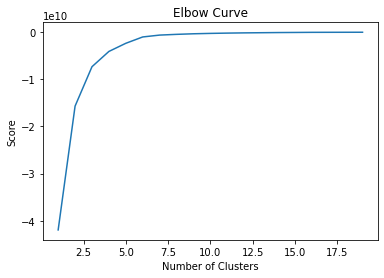

In [23]:
pl.plot(N,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

What does the optimal number of clusters seem to be?

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**
Number of clusters = 4     should be the best decision.

'Elbow point' is a point where the slope quite suddenly changes from rather
steep to very shallow. 

Further clusters don't help to reduce the distances.

Without normalising the data, the best number of clusters is around 4, so let's try that out!

Complete the code cell below by following these steps:
- Use `KMeans()` to compute the optimal K-mean `km` by choosing the optimal number of clusters.
- Use `.fit()` to compute K-means clustering.
- Use the `km` attribute `predict()` on `sub_df` to predict the closest cluster each sample belongs to.

You can find the documentation about these functions [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict).

In [24]:
km = KMeans(n_clusters=4) 
#Use fit on dataframe
km.fit(sub_df)
#compute y
y = km.predict(sub_df)


Great! Run the code cell below to define the clusters for each point.

In [25]:
sub_df['Cluster'] = y
sub_df.head(7)

,District,Ward,IUCR,Cluster
0,2.0,4.0,497,3
1,15.0,29.0,1320,1
2,17.0,39.0,141,3
3,11.0,27.0,2092,0
4,11.0,24.0,1506,1
5,19.0,47.0,1811,0
6,14.0,1.0,620,3


Run the code cell below to visualise the clusters obtained without normalisation.

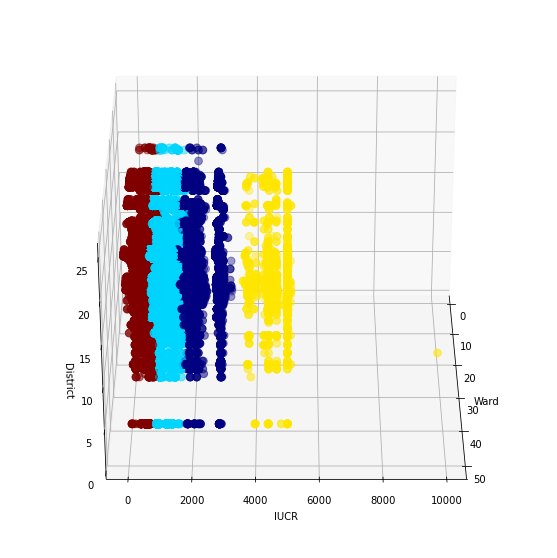

In [26]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_df["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 - Clustering with normalisation

As expected, K-means without normalisation simply clusters the data based on the Euclidean distances of the IUCR codes. We can fix this by normalising the data.

In the code cell below, we have normalised the column `IUCR` using the formula:

$$y_\text{norm} = \frac{y - \min(y)}{\max(y) - \min(y)}$$

In [27]:
sub_df['IUCR'] = (sub_df['IUCR'] - sub_df['IUCR'].min())/(sub_df['IUCR'].max()-sub_df['IUCR'].min())

Complete the code cell below to normalise the columns `Ward` and `District` following the example given above.

In [28]:
sub_df['Ward'] = (sub_df['Ward'] - sub_df['Ward'].min())/(sub_df['Ward'].max()-sub_df['Ward'].min())
sub_df['District'] = (sub_df['District'] - sub_df['District'].min())/(sub_df['District'].max()-sub_df['District'].min())

Following what we did in Part 4, compute the updated K-means and scores for the normalised data.

Complete the code cell below accordingly.

In [29]:
N = range(1, 20)
kmeans = []
for i in N:
    #compute the values for each number of clusters
    kn = KMeans(n_clusters=i) 
    kmeans.append(kn)


score_norm = []
for i in range(len(kmeans)):
    #compute updated score
    score_norm.append(kmeans[i].fit(sub_df).score(sub_df))


Finally, let's plot our new elbow curve. Run the code below to plot the elbow curve.

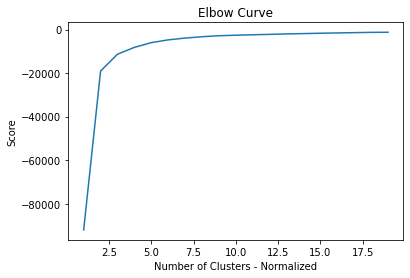

In [30]:
pl.plot(N,score_norm)
pl.xlabel('Number of Clusters - Normalized')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show() 

What does the optimal number of clusters seem to be now?

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**
Number of Clusters = 2

With normalised data, the optimal number of clusters seems to be two now!

Following what we did in Part 4, run `KMeans` with the updated number of clusters. Don't forget to include all the steps!

In [31]:
km = KMeans(n_clusters=2) 
km.fit(sub_df)
y = km.predict(sub_df)


In [32]:
sub_df['Cluster'] = y
sub_df.head(7)

,District,Ward,IUCR,Cluster
0,0.041667,0.061224,0.047214,1
1,0.583333,0.571429,0.130598,0
2,0.666667,0.775510,0.011145,1
3,0.416667,0.530612,0.208815,0
4,0.416667,0.469388,0.149443,0
5,0.750000,0.938776,0.180344,0
6,0.541667,0.000000,0.059676,1


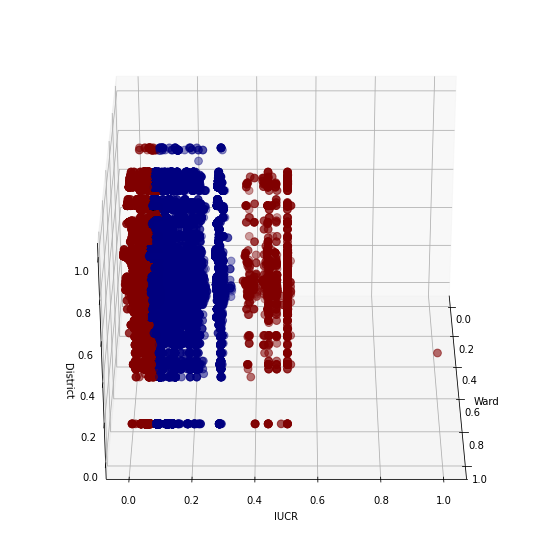

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(sub_df['Ward'])
y = np.array(sub_df['IUCR'])
z = np.array(sub_df['District'])

ax.set_xlabel('Ward')
ax.set_ylabel('IUCR')
ax.set_zlabel('District')

ax.scatter(x,y,z, marker="o", c = sub_df["Cluster"], s=60, cmap="jet")
ax.view_init(azim=0)
#print(ax.azim)
plt.show()

Here's what the updated clusters look like.

![](cluster_norm.png)


What differences can you infer from this updated graph? Is it a good or  bad thing?

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

The number of clusters has decreased, which is good, since it simplifies the model. But the downside here is that the blue cluster is partially located between the parts of the red cluster.

[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 - Hierarchical clustering
    
During this week, you have also learnt about another type of clustering technique called **hierarchical clustering**.


Hierarchical clustering, also known as hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other, and the objects within each cluster are broadly similar to each other.

#### How hierarchical clustering works
Hierarchical clustering starts by treating each observation as a separate cluster. Then, it repeatedly executes the following two steps: (1) identify the two clusters that are closest together and (2) merge the two most similar clusters. This iterative process continues until all the clusters are merged together. 


![](cluster_1.png)

The main output of hierarchical clustering is a **dendrogram**, which shows the hierarchical relationship between the clusters:


![](cluster_2.png)


#### Measures of distance (similarity)
In the example above, the distance between two clusters has been computed based on the length of the straight line drawn from one cluster to the other. This is commonly referred to as the Euclidean distance. Many other distance metrics have been developed.

The choice of distance metric should be made based on theoretical concerns from the domain of study. That is, a distance metric needs to define similarity in a way that is sensible for the field of study. For example, if clustering crime sites in a city (like in the worked example above), the city block distance may be appropriate. Or, better yet, the time taken to travel between each location. Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.


#### Linkage criteria
After selecting a distance metric, it is necessary to determine from where distance is computed. For example, it can be computed between the two most similar parts of a cluster (single-linkage), the two least similar bits of a cluster (complete-linkage), the centre of the clusters (mean or average-linkage), or some other criterion. Many linkage criteria have been developed.

As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application. A key theoretical issue is what causes variation. For example, in archaeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.


### Steps to perform hierarchical clustering

- Step 1: First, we assign all the points to an individual cluster.
- Step 2: Next, we will look at the smallest distance in the proximity matrix and merge the points with the smallest distance.
- Step 3: We will repeat Step 2 until only a single cluster is left.
- Step 4: How should we choose the number of clusters in hierarchical clustering?

To get the number of clusters for hierarchical clustering, we make use of an awesome concept called a dendrogram.
Whenever two clusters are merged, we will join them in this dendrogram and the height of the join will be the distance between these points. Therefore, the longer the distance of the vertical lines in the dendrogram, the longer the distance between those clusters.

Finally, we can set a threshold distance and draw a horizontal line across the dendrogram. The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.


![](cluster_3.png)

[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - A simple example of hierarchical clustering

After seeing what the basic steps of hierarchical clustering are, it's now time to walk through a simple example to test our understanding.

We will be working on a wholesale customer segmentation problem. You can download the data set using [this](https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv) link. The data is hosted on the UCI Machine Learning repository. 

The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories such as milk, grocery, region, etc.

As usual, we begin by importing the data set, Complete the code cell below by adding the name of the data set, "Wholesale customers data.csv" a `str` to `.read_csv()`. Assign the dataframe to the variable `data`.

In [34]:
data = pd.read_csv('Wholesale customers data.csv')


Run the code cell below to visualise the first five rows of our dataframe.

In [35]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. 

Our aim is to make clusters from this data that can segment similar clients together. Of course, hierarchical clustering seems to be the right strategy to solve this problem.



In Part 5 of this assignment, we saw how important it is to normalise the data so that the scale of each variable is the same. 

Why is this important?

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

There are products that are bought more often than others. 
The number of purchases from different products can vary greatly and the data is on different scales. 
This can affect the result and the data needs to be normalized.

Run the code cell below to import the function `normalize()` from `scikit-learn` that we will use to normalise the data

In [36]:
from sklearn.preprocessing import normalize

Complete the code cell below by normalising the dataframe `data`. Assign the new data to the object `data_scaled`.

Next, use the `pandas` function `DataFrame()` to convert `data_scaled` to a dataframe `data_scaled`.
For convenience, set the parameter `columns = data.columns` to keep the original column names.

In [37]:
#normalize the data
data_scaled = normalize(data)

#create a new datafarame
data_scaled = pd.DataFrame(data_scaled, columns = data.columns)


Run the code cell below to visualise the normalised dataframe.

In [38]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Next,  let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

Run the code cell below to create the dendrogram.

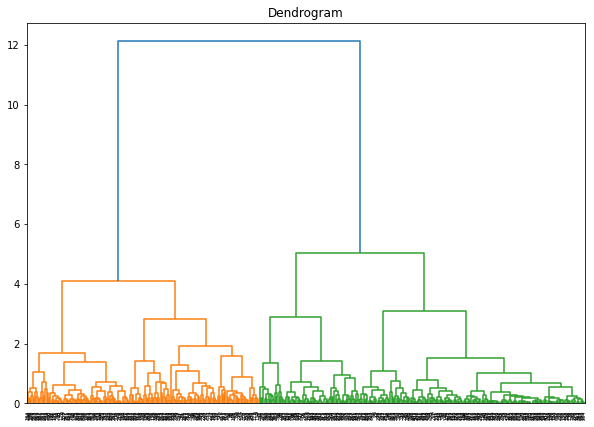

In [39]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence, we can decide on a threshold of 6 and cut the dendrogram.

Run the code cell below to visualise the dendrogram with the threshold line.

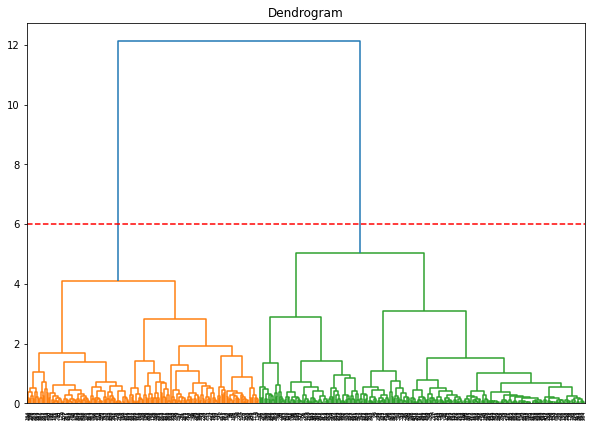

In [40]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

How many clusters do we have at this point?

**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**

2 clusters

We can now use the `AgglomerativeClustering()` from `scikit-learn` to apply hierarchical clustering for two clusters. The documentation about this function can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html).

In [41]:
from sklearn.cluster import AgglomerativeClustering

Complete the code cell below by setting the following parameters for `AgglomerativeClustering`
    
- `n_clusters = 2`
- `affinity='euclidean`
- `linkage='ward`

Finally, use the `fit_predict()` of the scaled dataframe to apply the clustering to our data.

In [42]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity='euclidean',  linkage='ward')

#use fit predict on the scaled dataframe
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

Why can we only see the values of 0s and 1s in the output?


**DOUBLE CLICK ON THIS CELL TO TYPE YOUR ANSWER**
Because we only have 2 clusters.


Let’s now visualise the two clusters:

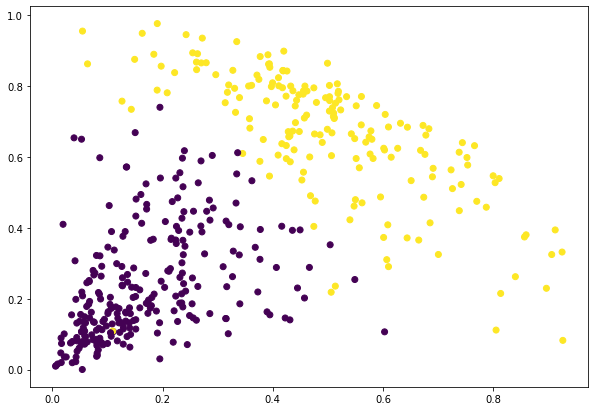

In [43]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

Awesome! As expected, we can clearly visualise the two clusters.

CONGRATULATIONS ON COMPLETING THE WEEK 10 ASSIGNMENT!